# Compare Cost Function Values of different Methods 
----

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import os

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Running on {}!'.format(device))

Running on cpu!


In [10]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [11]:
methods = ['graph_optimization','newton_method','broyden_method']

### Node Classification Datasets

In [ ]:
datasets_node = ['cora','reddit-self-loop','ppi']

In [ ]:
H_node = []
for dataset in datasets_node:
    for method in methods:
        path = '../src/run/H_' + dataset + '_' + method + '.pkl'
        model_file = os.path.join(os.getcwd(), path)
        h = torch.load(model_file,map_location=device).numpy()
        H_node.append(h)

### Graph Classification Dataset

In [33]:
datasets_graph = ['aids','reddit-binary','imdb-binary','proteins','mutag','enzymes','imdb-multi','msrc_9']

In [95]:
# read data from file
H_graph = []
for dataset in datasets_graph:
    for method in methods:
        path = '../src/outputs/H_' + dataset + '_' + method + '.pkl'
        file = os.path.join(os.getcwd(), path)
        h = torch.load(file,map_location=device)
        H_graph.append(h)

cost_func_graph = []
for dataset in datasets_graph:
    for method in methods:
        path = '../src/outputs/cost_func_' + dataset + '_' + method + '.pkl'
        file = os.path.join(os.getcwd(), path)
        cf = torch.load(file,map_location=device)
        cost_func_graph.append(cf)
        
indices_graph = []
for dataset in datasets_graph:
    for method in methods:
        path = '../src/outputs/indices_' + dataset + '_' + method + '.pkl'
        file = os.path.join(os.getcwd(), path)
        ind = torch.load(file,map_location=device)
        indices_graph.append(ind)

##########aids##########


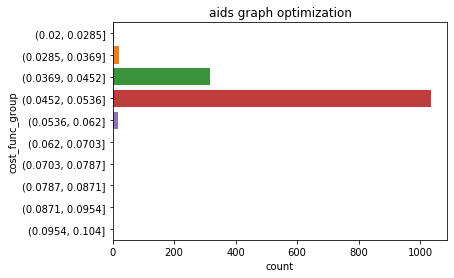

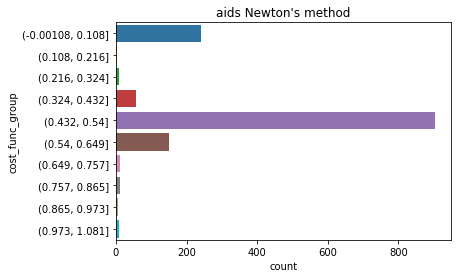

aids:Intermediate result of Newton's method! Result for 1154 graphs available.


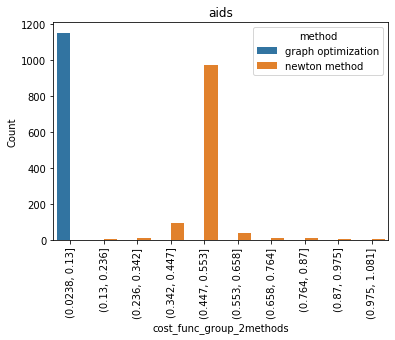

##########reddit-binary##########


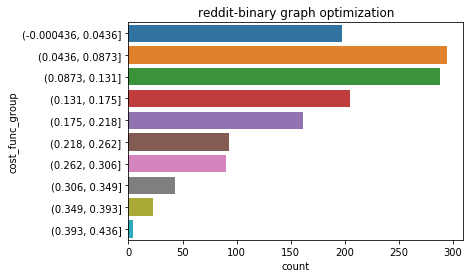

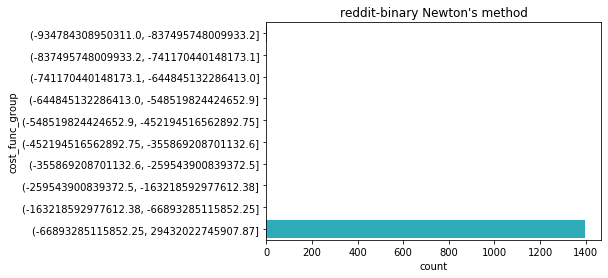

reddit-binary:Intermediate result of Newton's method! Result for 5 graphs available.


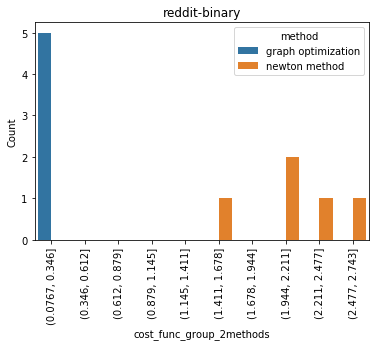

##########imdb-binary##########


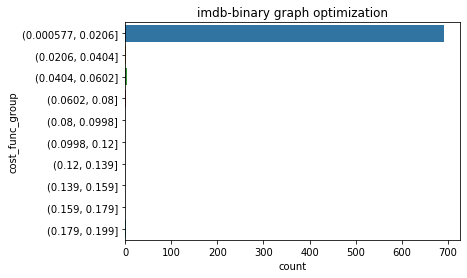

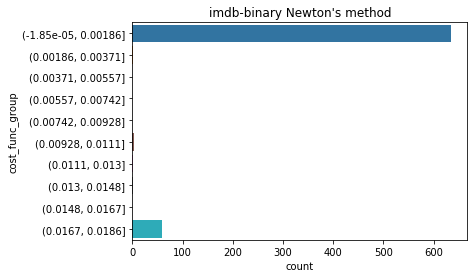

Both successfully finished!


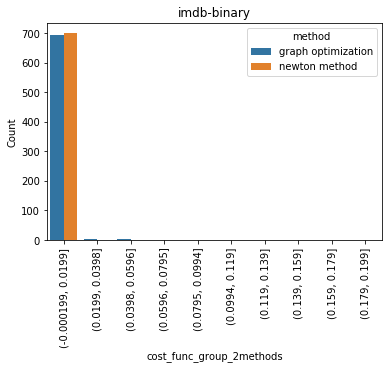

In [96]:
# cost function value visualization
for i in np.arange(len(cost_func_graph)):
    if i % len(methods) == 0:
        dataset_num = int(i/len(methods))
        dataset_name = datasets_graph[dataset_num]
        print('********** '+dataset_name+' **********')
        
        df_graph_optimization = pd.DataFrame({'graph_id': np.arange(len(cost_func_graph[i])),
                                             'method': 'graph optimization',
                                             'min_cost_func': cost_func_graph[i]})
        df_newton_method = pd.DataFrame({'graph_id': np.arange(len(cost_func_graph[i])),
                                             'method': 'newton method',
                                             'min_cost_func': cost_func_graph[i+1]})
        df_graph_optimization['cost_func_group'] = pd.cut(df_graph_optimization['min_cost_func'],10)
        df_newton_method['cost_func_group'] = pd.cut(df_newton_method['min_cost_func'],10)
        
        plt.title(dataset_name + ' graph optimization')
        sns.countplot(y = 'cost_func_group', data = df_graph_optimization)
        plt.show()
        plt.title(dataset_name + ' Newton\'s method')
        sns.countplot(y = 'cost_func_group', data = df_newton_method)
        plt.show()
                                                    
        # if result is saved before return to main
        if len(H_graph[i])!=len(H_graph[i+1]):
            if len(H_graph[i])<len(H_graph[i+1]):
                length = len(H_graph[i])
                print("{}:Intermediate result of graph optimization! Result for {} graphs available.".format(dataset_name,length))
            else:
                length = len(H_graph[i+1])
                print("{}:Intermediate result of Newton's method! Result for {} graphs available.".format(dataset_name,length))
        else:
            length = len(H_graph[i])
            print("Both successfully finished!")
            
        df_2methods = pd.concat([df_graph_optimization[:length], df_newton_method[:length]], axis=0, ignore_index=True)
        df_2methods['cost_func_group_2methods'] = pd.cut(df_2methods['min_cost_func'],10)
        group_df = df_2methods.groupby(['method','cost_func_group_2methods']).size().reset_index(name='Count')
         
        plt.title(dataset_name)
        g = sns.barplot(x = 'cost_func_group_2methods', y = 'Count', hue = 'method', data = group_df)
        for item in g.get_xticklabels():
            item.set_rotation(90)
    
        plt.show()

In [ ]:
# cost function value visualization
for i in np.arange(len(cost_func_graph)):
    if i % len(methods) == 0:
        dataset_num = int(i/len(methods))
        dataset_name = datasets_graph[dataset_num]
        print('********** '+dataset_name+' **********')
        
        df_list = []
        for j in np.arange(len(methods))
            df = pd.DataFrame({'graph_id': np.arange(len(cost_func_graph[i+j])),
                                'method': methods[j],
                                'min_cost_func': cost_func_graph[i+j]})
            df_list.append(df)
        
        # plot for each method
        for method_num,df in zip(np.arange(len(methods)),df_list):
            df['cost_func_group'] = pd.cut(df['min_cost_func'],10)
        
            plt.title(dataset_name + methods[method_num])
            sns.countplot(y = 'cost_func_group', data = df)
            plt.show()
        
        # check if result is saved before return to main
        config_path = '../src/configs/tu_' + dataset_name + '.yaml'
        config_file = os.path.join(os.getcwd(), path)
        with open(config_file, 'r') as f:
            config = yaml.load(f, Loader=yaml.FullLoader)
        training_set_len = int(config[dataset_len] * config[train_ratio])
        length = training_set_len
        for j in np.arange(len(methods)):
            if len(H_graph[i+j])<training_set_len:
                print("{}:Intermediate result of {}! Result for {} graphs available.".format(dataset_name,methods[j],len(H_graph[i+j])))
                length = min(length,len(H_graph[i+j]))
        if length==training_set_len:
            print("All methods successfully finished!")
        
        # plot all methods together
        for df in df_list:
            df = df[:length]
        df_methods = pd.concat(df_list, axis=0, ignore_index=True)
        df_methods['cost_func_group_methods'] = pd.cut(df_methods['min_cost_func'],10)
        group_df = df_methods.groupby(['method','cost_func_group_methods']).size().reset_index(name='Count')
         
        plt.title(dataset_name)
        g = sns.barplot(x = 'cost_func_group_methods', y = 'Count', hue = 'method', data = group_df)
        for item in g.get_xticklabels():
            item.set_rotation(90)
        plt.show()

In [97]:
num_found_array = np.zeros([2,3])
for i in np.arange(len(indices_graph)):
    if i % len(methods) == 0:
        dataset_num = int(i/len(methods))
        dataset_name = datasets_graph[dataset_num]
        
        num_found_array[0,dataset_num] = indices_graph[i][indices_graph[i] == True].shape[0]
        num_found_array[1,dataset_num] = indices_graph[i+1][indices_graph[i+1] == True].shape[0]

num_found_df = pd.DataFrame(num_found_array,index=['graph optimization','newton\'s method'],columns=datasets_graph)
num_found_df

##########aids##########
##########reddit-binary##########
##########imdb-binary##########


,aids,reddit-binary,imdb-binary
graph optimization,0.0,0.0,10.0
newton's method,4.0,0.0,635.0


In [ ]:
num_found_array = np.zeros([len(methods),len(datasets_graph)])
for i in np.arange(len(indices_graph)):
    if i % len(methods) == 0:
        dataset_num = int(i/len(methods))
        dataset_name = datasets_graph[dataset_num]
        
        for j in np.arange(len(methods)):
            num_found_array[j,dataset_num] = indices_graph[i+j][indices_graph[i+j] == True].shape[0]

num_found_df = pd.DataFrame(num_found_array,index=methods,columns=datasets_graph)
num_found_df